In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [2]:
col_names = [ 'duration'
, 'protocol_type' 
, 'service'
, 'flag'
, 'src_bytes' 
, 'dst_bytes' 
, 'land' 
, 'wrong_fragment' 
, 'urgent' 
, 'hot' 
, 'num_failed_logins' 
, 'logged_in' 
, 'num_compromised' 
, 'root_shell' 
, 'su_attempted' 
, 'num_root' 
, 'num_file_creations' 
, 'num_shells' 
, 'num_access_files' 
, 'num_outbound_cmds' 
, 'is_host_login'  
, 'is_guest_login' 
, 'count' 
, 'srv_count' 
, 'serror_rate' 
, 'srv_serror_rate' 
, 'rerror_rate' 
, 'srv_rerror_rate' 
, 'same_srv_rate' 
, 'diff_srv_rate' 
, 'srv_diff_host_rate' 
, 'dst_host_count' 
, 'dst_host_srv_count' 
, 'dst_host_same_srv_rate' 
, 'dst_host_diff_srv_rate' 
, 'dst_host_same_src_port_rate' 
, 'dst_host_srv_diff_host_rate' 
, 'dst_host_serror_rate' 
, 'dst_host_srv_serror_rate' 
, 'dst_host_rerror_rate' 
, 'dst_host_srv_rerror_rate' 
, 'class'
, 'diffic' ]

In [3]:
df_train = pd.read_csv('KDDTrain+.txt', sep=",", header=None, names= col_names)
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None, names= col_names)
print(df_train.shape)
print(df_test.shape)

(125973, 43)
(22544, 43)


In [4]:
df_train['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:
class_dict= {'normal': 'normal',
                        
                        'back': 'DoS',
                        'land': 'DoS',
                        'neptune': 'DoS',
                        'pod': 'DoS',
                        'smurf': 'DoS',
                        'teardrop': 'DoS',
                        'mailbomb': 'DoS',
                        'apache2': 'DoS',
                        'processtable': 'DoS',
                        'udpstorm': 'DoS',
                        
                        'ipsweep': 'Probe',
                        'nmap': 'Probe',
                        'portsweep': 'Probe',
                        'satan': 'Probe',
                        'mscan': 'Probe',
                        'saint': 'Probe',
                    
                        'ftp_write': 'R2L',
                        'guess_passwd': 'R2L',
                        'imap': 'R2L',
                        'multihop': 'R2L',
                        'phf': 'R2L',
                        'spy': 'R2L',
                        'warezclient': 'R2L',
                        'warezmaster': 'R2L',
                        'sendmail': 'R2L',
                        'named': 'R2L',
                        'snmpgetattack': 'R2L',
                        'snmpguess': 'R2L',
                        'xlock': 'R2L',
                        'xsnoop': 'R2L',
                        'worm': 'R2L',
                        
                        'buffer_overflow': 'U2R',
                        'loadmodule': 'U2R',
                        'perl': 'U2R',
                        'rootkit': 'U2R',
                        'httptunnel': 'U2R',
                        'ps': 'U2R',    
                        'sqlattack': 'U2R',
                        'xterm': 'U2R'}

In [6]:
df_train['class'] = df_train['class'].apply(class_dict.get)

In [7]:
df_test['class'] = df_test['class'].apply(class_dict.get)

In [8]:
df_test['class'].unique()

array(['DoS', 'normal', 'Probe', 'R2L', 'U2R'], dtype=object)

In [9]:
df_train['class'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [10]:
df_train['class'].value_counts()

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: class, dtype: int64

In [12]:
df_test['class'].value_counts()

normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: class, dtype: int64

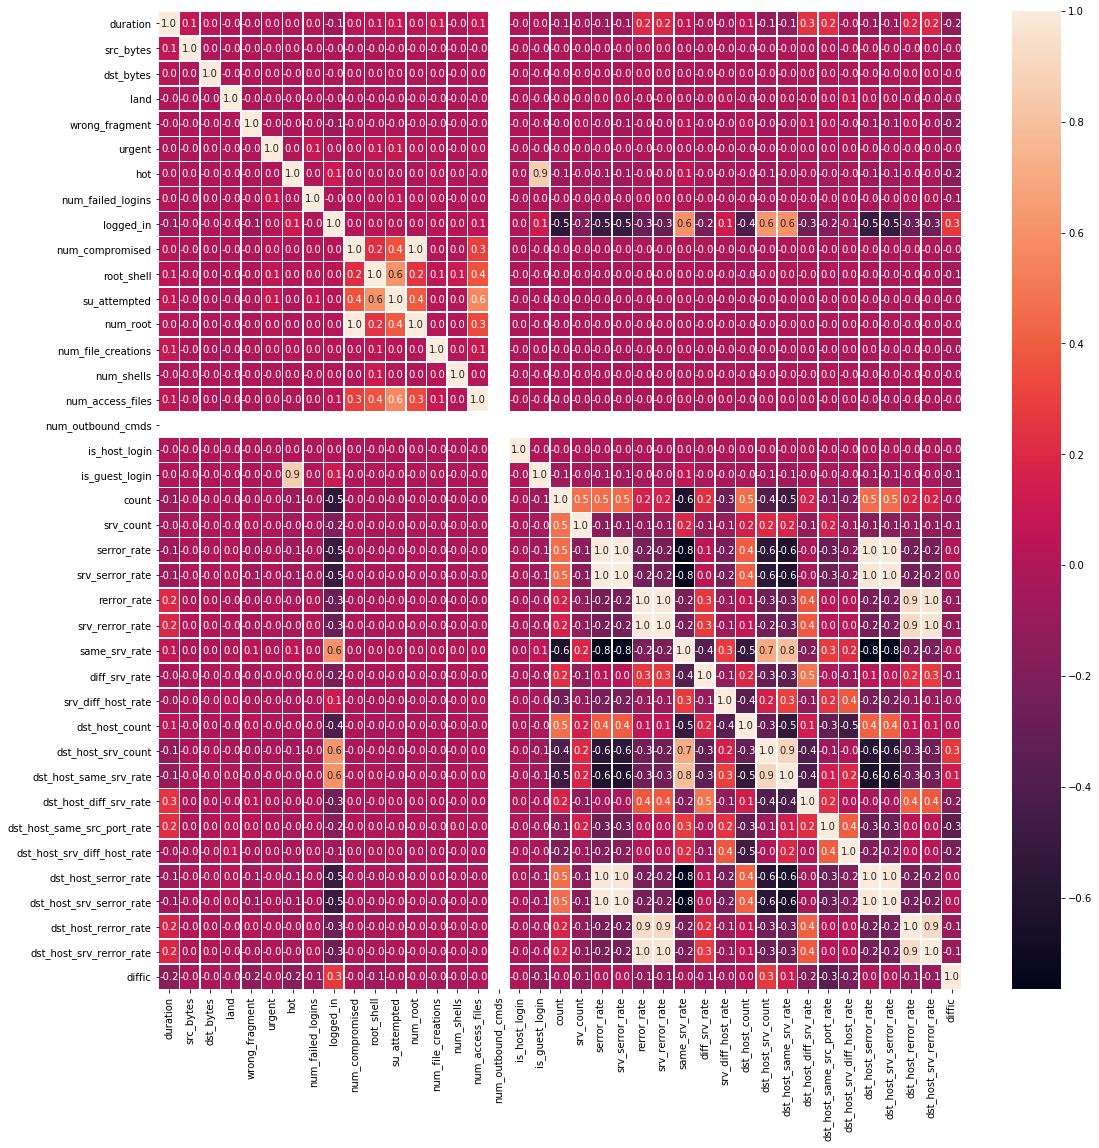

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [14]:
binary_dict = {'normal': 'normal',
                'DoS': 'attack',
                'R2L': 'attack',
                'Probe': 'attack',
                'U2R': 'attack'}

df_train_bi = df_train.copy()
df_test_bi = df_test.copy()

df_train_bi['class'] = df_train_bi['class'].apply(binary_dict.get)
df_test_bi['class'] = df_test_bi['class'].apply(binary_dict.get)


print('Train data class: ',df_train_bi['class'].unique())
print('Train data class: ',df_test_bi['class'].unique())

print('Train data dim: ',df_train_bi.shape)
print('Test data dim: ',df_test_bi.shape)


Train data class:  ['normal' 'attack']
Train data class:  ['attack' 'normal']
Train data dim:  (125973, 43)
Test data dim:  (22544, 43)


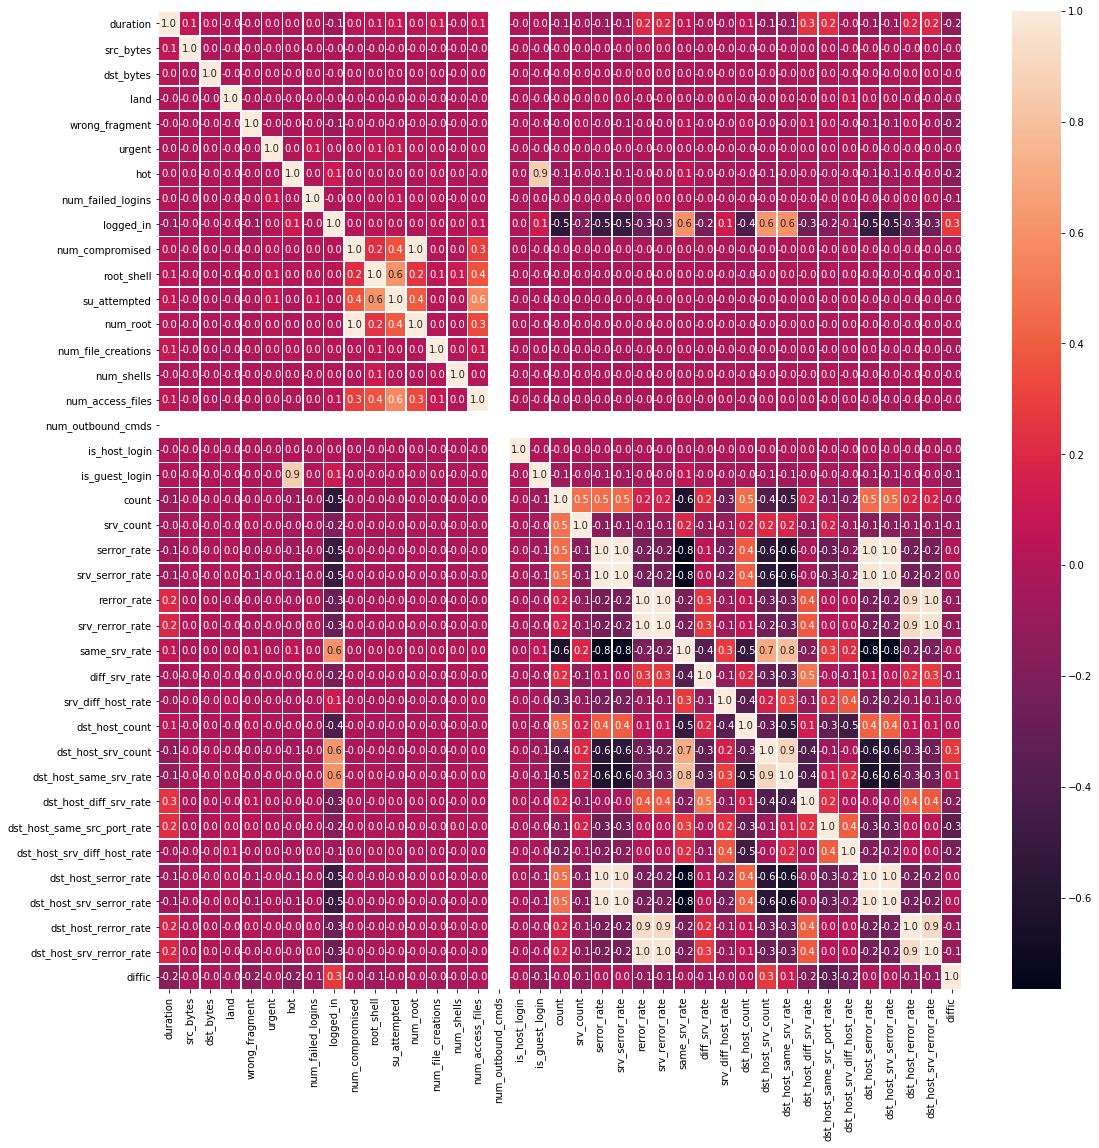

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train_bi.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
corr_matrix = df_train_bi.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(len(high_corr_var))
print(high_corr_var)

13
[('num_compromised', 'num_root'), ('serror_rate', 'srv_serror_rate'), ('serror_rate', 'dst_host_serror_rate'), ('serror_rate', 'dst_host_srv_serror_rate'), ('srv_serror_rate', 'dst_host_serror_rate'), ('srv_serror_rate', 'dst_host_srv_serror_rate'), ('rerror_rate', 'srv_rerror_rate'), ('rerror_rate', 'dst_host_rerror_rate'), ('rerror_rate', 'dst_host_srv_rerror_rate'), ('srv_rerror_rate', 'dst_host_rerror_rate'), ('srv_rerror_rate', 'dst_host_srv_rerror_rate'), ('dst_host_serror_rate', 'dst_host_srv_serror_rate'), ('dst_host_rerror_rate', 'dst_host_srv_rerror_rate')]


In [17]:
pd.pandas.set_option('display.max_columns', None)
df_train.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised     root_shell   su_attempted  \
count  125973.000000    125973.000000  125973.000000  125973.000000   
mean        0.395736         0.279250       0.001342       0.001103   
std         0.489010        23.942042       0.036603       0.045154   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         0.000000       0.000000       0.000000   
50%         0.000000         0.000000       0.000000       0.000000   
75%         1.000000         0.000000       0.000000       0.000000   
max         1.000000      7479.000000       1.000000       2.000000   

            num_root  num_file_creations     num_shells  num_access_files  \
count  125973.000000       125973.000000  125973.000000     125973.000000   
mean        0.302192            0.012669       0.000413          0.004096   
std        24.399618            0.483935       0.022181          0.099370   
min         0.000000            0.000000       0.000000          0.000000   
25%         0.000000            0.000000       0.000000          0.000000   
50%         0.000000            0.000000       0.000000          0.000000   
75%         0.000000            0.000000       0.000000          0.000000   
max      7468.000000           43.000000       2.000000          9.000000   

       num_outbound_cmds  is_host_login  is_guest_login          count  \
count           125973.0  125973.000000   125973.000000  125973.000000   
mean                 0.0       0.000008        0.009423      84.107555   
std                  0.0       0.002817        0.096612     114.508607   
min                  0.0       0.000000        0.000000       0.000000   
25%                  0.0       0.000000        0.000000       2.000000   
50%                  0.0       0.000000        0.000000      14.000000   
75%                  0.0       0.000000        0.000000     143.000000   
max                  0.0       1.000000        1.000000     511.000000   

           srv_count    serror_rate  srv_serror_rate    rerror_rate  \
count  125973.000000  125973.000000    125973.000000  125973.000000   
mean       27.737888       0.284485         0.282485       0.119958   
std        72.635840       0.446456         0.447022       0.320436   
min         0.000000       0.000000         0.000000       0.000000   
25%         2.000000       0.000000         0.000000       0.000000   
50%         8.000000       0.000000         0.000000       0.000000   
75%        18.000000       1.000000         1.000000       0.000000   
max       511.000000       1.000000         1.000000       1.000000   

       srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
count    125973.000000  125973.0

In [18]:
train_cat_vars = [var for var in df_train.columns if df_train[var].dtypes == 'O']

print('Number of categorical variables in Train data: ', len(train_cat_vars))
df_train_cat_vars = ['protocol_type', 'service', 'flag']
# visualise the numerical variables
df_train[df_train_cat_vars].head()

Number of categorical variables in Train data:  4


protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF

In [19]:
test_cat_vars = [var for var in df_test.columns if df_test[var].dtypes == 'O']

print('Number of categorical variables in Test data: ', len(test_cat_vars))
df_test_cat_vars = ['protocol_type', 'service', 'flag']
# visualise the numerical variables

df_test[df_test_cat_vars].head()

Number of categorical variables in Test data:  4


protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO

In [20]:
df_train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [21]:
df_train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [22]:
df_train['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [23]:
print(df_test.service.unique())
print(df_test['service'].value_counts())

['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64


In [24]:
unique_protocol=sorted(df_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print('Training dataset Dummy Columns:  ', len(dumcols))
print()
print(dumcols)
print()
print()

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print('Testing dataset Dummy Columns:  ', len(testdumcols))
print()
print(testdumcols)
print()
print()

Training dataset Dummy Columns:   84

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'servi

In [25]:
##Label encoding for transforming categorical variables into numbers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_train_categorical_values= df_train[df_train_cat_vars]
df_test_categorical_values = df_test[df_test_cat_vars]

df_train_categorical_values_enc=df_train_categorical_values.apply(LabelEncoder().fit_transform)
print(df_train_categorical_values_enc.head())
# test set
df_test_categorical_values_enc=df_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [26]:
print(df_train_categorical_values_enc['protocol_type'].value_counts())
print(df_train_categorical_values_enc['service'].value_counts())
print(df_train_categorical_values_enc['flag'].value_counts())
# print(df_train_categorical_values_enc['class'].value_counts())

1    102689
2     14993
0      8291
Name: protocol_type, dtype: int64
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
22        2
27        2
3         2
25        1
Name: service, Length: 70, dtype: int64
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64


In [27]:
enc = OneHotEncoder()
df_train_categorical_values_encenc = enc.fit_transform(df_train_categorical_values_enc)
df_train_cat_data = pd.DataFrame(df_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
df_test_categorical_values_encenc = enc.fit_transform(df_test_categorical_values_enc)
df_test_cat_data = pd.DataFrame(df_test_categorical_values_encenc.toarray(),columns=testdumcols)


print(df_train_cat_data.shape)
df_train_cat_data.head()

(125973, 84)


Protocol_type_icmp  Protocol_type_tcp  Protocol_type_udp  service_IRC  \
0                 0.0                1.0                0.0          0.0   
1                 0.0                0.0                1.0          0.0   
2                 0.0                1.0                0.0          0.0   
3                 0.0                1.0                0.0          0.0   
4                 0.0                1.0                0.0          0.0   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0          0.0             0.0          0.0           0.0          0.0   
1          0.0             0.0          0.0           0.0          0.0   
2          0.0             0.0          0.0           0.0          0.0   
3          0.0             0.0          0.0           0.0          0.0   
4          0.0             0.0          0.0           0.0          0.0   

   service_courier  service_csnet_ns  service_ctf  service_daytime  \
0              0.0               0.0          0.0              0.0   
1              0.0               0.0          0.0              0.0   
2              0.0               0.0          0.0              0.0   
3              0.0               0.0          0.0              0.0   
4              0.0               0.0          0.0              0.0   

   service_discard  service_domain  service_domain_u  service_echo  \
0              0.0             0.0               0.0           0.0   
1              0.0             0.0               0.0           0.0   
2              0.0             0.0               0.0           0.0   
3              0.0             0.0               0.0           0.0   
4              0.0             0.0               0.0           0.0   

   service_eco_i  service_ecr_i  service_efs  service_exec  service_finger  \
0            0.0            0.0          0.0           0.0             0.0   
1            0.0            0.0          0.0           0.0             0.0   
2            0.0            0.0          0.0           0.0             0.0   
3            0.0            0.0          0.0           0.0             0.0   
4            0.0            0.0          0.0           0.0             0.0   

   service_ftp  service_ftp_data  service_gopher  service_harvest  \
0          0.0               1.0             0.0              0.0   
1          0.0               0.0             0.0              0.0   
2          0.0               0.0             0.0              0.0   
3          0.0               0.0             0.0              0.0   
4          0.0               0.0             0.0              0.0   

   service_hostnames  service_http  service_http_2784  service_http_443  \
0                0.0           0.0                0.0               0.0   
1                0.0           0.0                0.0               0.0   
2                0.0           0.0                0.0               0.0   
3                0.0           1.0                0.0               0.0   
4                0.0           1.0                0.0               0.0   

   service_http_8001  service_imap4  service_iso_tsap  service_klogin  \
0                0.0            0.0               0.0             0.0   
1                0.0            0.0               0.0             0.0   
2                0.0            0.0               0.0             0.0   
3                0.0            0.0               0.0             0.0   
4                0.0            0.0               0.0             0.0   

   service_kshell  service_ldap  service_link  service_login  service_mtp  \
0             0.0           0.0           0.0            0.0          0.0   
1             0.0           0.0           0.0            0.0          0.0   
2             0.0           0.0           0.0            0.0          0.0   
3             0.0           0.0           0.0            0.0          0.0   
4             0.0           0.0           0.0            0.0          0.0   

   service_name  servi

In [28]:
### Replacing 6 missing Service Values in Test DF
trainservice=df_train['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_http_2784',
 'service_harvest',
 'service_http_8001',
 'service_urh_i',
 'service_red_i']

In [29]:
###Adding 6 missing Service Values in Test DF
for col in difference:
    df_test_cat_data[col] = 0

df_test_cat_data.shape

(22544, 84)

In [29]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = data.columns[columns]
# data = data[selected_columns]

In [30]:
C_df_train=df_train.join(df_train_cat_data)
C_df_train.drop('flag', axis=1, inplace=True)
C_df_train.drop('protocol_type', axis=1, inplace=True)
C_df_train.drop('service', axis=1, inplace=True)
# test data
C_df_test=df_test.join(df_test_cat_data)
C_df_test.drop('flag', axis=1, inplace=True)
C_df_test.drop('protocol_type', axis=1, inplace=True)
C_df_test.drop('service', axis=1, inplace=True)
print(C_df_train.shape)
print(C_df_test.shape)

(125973, 124)
(22544, 124)


In [31]:
C_df_train['class'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [32]:
binary_dict_1_0 = {'normal': 0,
                'DoS': 1,
                'R2L': 1,
                'Probe': 1,
                'U2R': 1}

In [33]:
F_df_train = C_df_train.copy()
F_df_test = C_df_test.copy()

In [34]:
F_df_train['class'] = F_df_train['class'].apply(binary_dict_1_0.get)
F_df_test['class'] = F_df_test['class'].apply(binary_dict_1_0.get)


print('Train data class: ',F_df_train['class'].unique())
print('Train data class: ',F_df_test['class'].unique())

print('Train data dim: ',F_df_train.shape)
print('Test data dim: ',F_df_test.shape)

Train data class:  [0 1]
Train data class:  [1 0]
Train data dim:  (125973, 124)
Test data dim:  (22544, 124)


In [35]:
X_train = F_df_train.drop('class',1)
y_train = F_df_train['class']
X_test = F_df_test.drop('class',1)
y_test = F_df_test['class']

print('X_Train data dim: ',X_train.shape)
print('X_Test data dim: ',X_test.shape)
print('X_Train data target dim: ',y_train.shape)
print('X_Test data target dim: ',y_test.shape)

X_Train data dim:  (125973, 123)
X_Test data dim:  (22544, 123)
X_Train data target dim:  (125973,)
X_Test data target dim:  (22544,)


In [36]:
colNames_train=list(X_train.columns)
colNames_test=list(X_test)

In [37]:
print(len(colNames_train))
print(len(colNames_test))

123
123


In [82]:
X_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                0.00             150                  25   
1           0.15                0.00             255                   1   
2           0.07                0.00             255                  26   
3           0.00                0.00              30                 255   
4           0.00                0.09             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  diffic  Protocol_type_icmp  Protocol_type_tcp  \
0                      0.00      20                 0.0                1.0   
1                      0.00 

In [95]:
X_test.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         2      12983          0     0               0       0    0   
3         0         20          0     0               0       0    0   
4         1          0         15     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          0                0           0             0   
4                  0          0                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0    229         10   
1                  0              0               0    136          1   
2                  0              0               0      1          1   
3                  0              0               0      1         65   
4                  0              0               0      1          8   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0             0.00          1.0              1.0           0.04   
1          0.0             0.00          1.0              1.0           0.01   
2          0.0             0.00          0.0              0.0           1.00   
3          0.0             0.00          0.0              0.0           1.00   
4          0.0             0.12          1.0              0.5           1.00   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.06                0.00             255                  10   
1           0.06                0.00             255                   1   
2           0.00                0.00             134                  86   
3           0.00                1.00               3                  57   
4           0.00                0.75              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  diffic  Protocol_type_icmp  Protocol_type_tcp  \
0                      1.00      21                 0.0                1.0   
1                      1.00 

In [39]:
from sklearn import preprocessing

scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train1=scaler_train.transform(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test1=scaler_test.transform(X_test)

print(X_train1.std(axis=0))
print(X_test1.std(axis=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0.]


In [40]:

#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newTrain = selector.fit_transform(X_train1,y_train)
X_newTrain.shape

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)


(125973, 13)

In [41]:
true=selector.get_support()
newcolindex_X_train=[i for i, x in enumerate(true) if x]
newcolname_X_train=list( colNames_train[i] for i in newcolindex_X_train )
newcolname_X_train

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']

In [42]:
### Feature Ranking

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newTrain, y_train)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_X_train)))

DoS Features sorted by their rank:
[(1, 'flag_SF'), (2, 'dst_host_same_srv_rate'), (3, 'count'), (4, 'logged_in'), (5, 'dst_host_srv_count'), (6, 'service_private'), (7, 'dst_host_serror_rate'), (8, 'dst_host_srv_serror_rate'), (9, 'same_srv_rate'), (10, 'serror_rate'), (11, 'service_http'), (12, 'srv_serror_rate'), (13, 'flag_S0')]


In [43]:
clf=DecisionTreeClassifier(random_state=0)

clf.fit(X_newTrain, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
X_newTest = X_test[newcolname_X_train]
# X_newTest = X_test.loc[:, newcolname_X_train]

clf.predict(X_newTest)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [45]:
clf.predict(X_newTest)[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
y_pred = clf.predict(X_newTest)

pd.crosstab(y_test,y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks     0     1
Actual attacks               
0                  7976  1735
1                  5153  7680

In [47]:
### Prediction with selected 13 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.92512 (+/- 0.01011)
Precision: 0.93708 (+/- 0.01424)
Recall: 0.93104 (+/- 0.01215)
F-measure: 0.93402 (+/- 0.00879)


In [48]:
clf_all=DecisionTreeClassifier(random_state=0)

clf_all.fit(X_train, y_train)

y_prediction = clf_all.predict(X_test)

pd.crosstab(y_test,y_prediction, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks     0     1
Actual attacks               
0                  9392   319
1                  3685  9148

In [49]:
### Prediction with selected all 123 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99574 (+/- 0.00214)
Precision: 0.99642 (+/- 0.00271)
Recall: 0.99610 (+/- 0.00209)
F-measure: 0.99626 (+/- 0.00188)


In [50]:
from feature_selector import FeatureSelector

In [51]:
X_train.shape

(125973, 123)

In [52]:
FS_df_train=X_train.join(y_train)
FS_df_train.shape

(125973, 124)

In [53]:


fs = FeatureSelector(data = X_train, labels = y_train )



In [54]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [55]:
fs.missing_stats.head()

missing_fraction
duration                      0.0
service_red_i                 0.0
service_printer               0.0
service_pop_3                 0.0
service_pop_2                 0.0

In [56]:
fs.identify_collinear(correlation_threshold = 0.80)

13 features with a correlation magnitude greater than 0.80.



In [ ]:
###############################
##################################
###https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0########

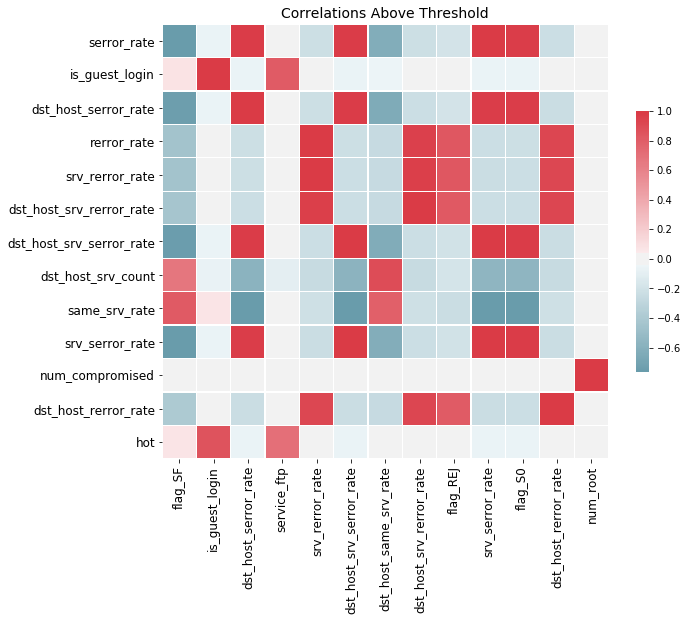

In [57]:
fs.plot_collinear()

In [58]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(20)

drop_feature              corr_feature  corr_value
0                   num_root           num_compromised    0.998833
1             is_guest_login                       hot    0.860288
2            srv_serror_rate               serror_rate    0.993289
3            srv_rerror_rate               rerror_rate    0.989008
4     dst_host_same_srv_rate        dst_host_srv_count    0.896663
5       dst_host_serror_rate               serror_rate    0.979373
6       dst_host_serror_rate           srv_serror_rate    0.977596
7   dst_host_srv_serror_rate               serror_rate    0.981139
8   dst_host_srv_serror_rate           srv_serror_rate    0.986252
9   dst_host_srv_serror_rate      dst_host_serror_rate    0.985052
10      dst_host_rerror_rate               rerror_rate    0.926749
11      dst_host_rerror_rate           srv_rerror_rate    0.917822
12  dst_host_srv_rerror_rate               rerror_rate    0.964449
13  dst_host_srv_rerror_rate           srv_rerror_rate    0.970208
14  dst_host_srv_rerror_rate      dst_host_rerror_rate    0.924688
15               service_ftp            is_guest_login    0.820069
16                  flag_REJ               rerror_rate    0.835068
17                  flag_REJ           srv_rerror_rate    0.841012
18                  flag_REJ      dst_host_rerror_rate    0.812842
19                  flag_REJ  dst_host_srv_rerror_rate    0.829071

In [59]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.999998	valid_0's binary_logloss: 0.00216111
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[287]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.0024582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[350]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.0014901
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[397]	valid_0's auc: 1	valid_0's binary_logloss: 0.000814837
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[341]	valid_0's auc: 1	valid_0's binary_logloss: 0.000346129
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[416]	valid_0's auc: 1	valid_0's binary_logloss: 0.000852553
Tr

In [112]:
print(zero_importance_features)

['service_harvest', 'service_uucp', 'num_outbound_cmds', 'service_sql_net', 'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat', 'num_access_files', 'service_tftp_u', 'service_tim_i', 'service_aol', 'service_urh_i', 'service_urp_i', 'service_uucp_path', 'service_rje', 'service_vmnet', 'service_whois', 'service_bgp', 'num_shells', 'service_courier', 'su_attempted', 'service_domain', 'urgent', 'service_discard', 'service_daytime', 'land', 'service_efs', 'service_remote_job', 'service_hostnames', 'service_name', 'service_Z39_50', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_exec', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_netbios_dgm', 'service_red_i', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_ctf', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'is_host_logi

In [60]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

51 features required for 0.99 of cumulative importance


In [61]:
fs.identify_low_importance(cumulative_importance = 0.99)

50 features required for cumulative importance of 0.99 after one hot encoding.
73 features do not contribute to cumulative importance of 0.99.



In [62]:
fs.feature_importances.head(50)

feature  importance  normalized_importance  \
0                     src_bytes      1321.7               0.149041   
1                        diffic      1223.5               0.137968   
2      dst_host_srv_serror_rate       399.5               0.045050   
3            dst_host_srv_count       383.4               0.043234   
4        dst_host_same_srv_rate       336.4               0.037934   
5                dst_host_count       309.4               0.034889   
6   dst_host_srv_diff_host_rate       309.0               0.034844   
7        dst_host_diff_srv_rate       306.4               0.034551   
8                     dst_bytes       303.0               0.034168   
9                         count       275.3               0.031044   
10         dst_host_serror_rate       273.2               0.030807   
11         dst_host_rerror_rate       269.0               0.030334   
12  dst_host_same_src_port_rate       206.1               0.023241   
13                     duration       196.3               0.022136   
14                service_ecr_i       188.1               0.021211   
15              service_private       186.6               0.021042   
16             service_ftp_data       179.9               0.020286   
17                          hot       177.3               0.019993   
18            Protocol_type_tcp       146.4               0.016509   
19                    logged_in       123.9               0.013972   
20                diff_srv_rate       116.2               0.013103   
21     dst_host_srv_rerror_rate       110.7               0.012483   
22                    srv_count       102.5               0.011558   
23                 service_http        98.4               0.011096   
24                  serror_rate        89.6               0.010104   
25             service_domain_u        86.0               0.009698   
26                same_srv_rate        78.6               0.008863   
27               wrong_fragment        77.6               0.008751   
28           Protocol_type_icmp        76.3               0.008604   
29              srv_serror_rate        67.0               0.007555   
30                      flag_S1        61.2               0.006901   
31                     num_root        59.5               0.006710   
32                      flag_SF        58.4               0.006585   
33                    flag_RSTR        56.6               0.006382   
34                    flag_RSTO        53.2               0.005999   
35              num_compromised        49.1               0.005537   
36                  rerror_rate        48.6               0.005480   
37               service_finger        45.7               0.005153   
38               service_telnet        37.2               0.004195   
39                service_other        35.5               0.004003   
40                 service_auth        35.3               0.003981   
41                service_eco_i        34.0               0.003834   
42                      flag_S0        31.7               0.003575   
43           srv_diff_host_rate        30.8               0.003473   
44                service_imap4        27.8               0.003135   
45                 service_smtp        20.5               0.002312   
46           num_file_creations        19.9               0.002244   
47            num_failed_logins        16.2               0.001827   
48                  service_ftp        15.5               0.001748   
49                  service_X11        15.4               0.001737   

    cumulative_importance  
0                0.149041  
1                0.287009  
2                0.332059  
3                0.375293  
4                0.413227  
5                0.448117  
6                0.482961  
7                0.517512  
8                0.551680  
9                0.582724  
10               0.613532  
11               0.643866  
12               0.667106  
13               0.689242  
14               0.710453  
15   

In [116]:
fs.identify_single_unique()

1 features with a single unique value.



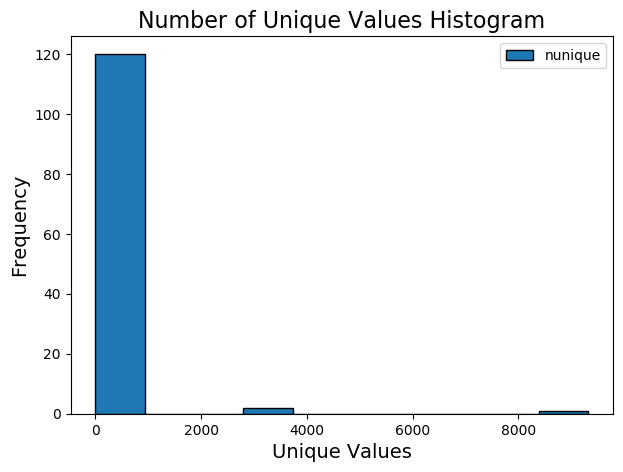

In [117]:
fs.plot_unique()

In [63]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.90, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.90})

0 features with greater than 0.60 missing values.

1 features with a single unique value.

8 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[327]	valid_0's auc: 1	valid_0's binary_logloss: 0.000549505
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.00245609
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[517]	valid_0's auc: 1	valid_0's binary_logloss: 0.000757318
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.999997	valid_0's binary_logloss: 0.00196443
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.999994	valid_0's binary_logloss: 0.00336485
Trainin

In [64]:
fs.feature_importances.head(50)

feature  importance  normalized_importance  \
0                     src_bytes      1146.2               0.151794   
1                        diffic      1073.8               0.142206   
2      dst_host_srv_serror_rate       325.1               0.043054   
3        dst_host_same_srv_rate       309.7               0.041014   
4            dst_host_srv_count       302.7               0.040087   
5                dst_host_count       257.7               0.034128   
6   dst_host_srv_diff_host_rate       256.1               0.033916   
7        dst_host_diff_srv_rate       242.7               0.032141   
8                     dst_bytes       235.2               0.031148   
9          dst_host_serror_rate       228.6               0.030274   
10                        count       226.7               0.030023   
11         dst_host_rerror_rate       224.8               0.029771   
12  dst_host_same_src_port_rate       184.9               0.024487   
13                service_ecr_i       174.2               0.023070   
14                     duration       163.7               0.021679   
15                          hot       163.2               0.021613   
16              service_private       155.3               0.020567   
17             service_ftp_data       151.0               0.019997   
18            Protocol_type_tcp       140.3               0.018580   
19                    logged_in       111.9               0.014819   
20                diff_srv_rate       105.0               0.013905   
21     dst_host_srv_rerror_rate        98.5               0.013045   
22                    srv_count        94.8               0.012555   
23                 service_http        84.5               0.011191   
24             service_domain_u        74.3               0.009840   
25                  serror_rate        73.5               0.009734   
26                same_srv_rate        68.2               0.009032   
27               wrong_fragment        64.3               0.008515   
28              srv_serror_rate        61.0               0.008078   
29           Protocol_type_icmp        53.4               0.007072   
30                    flag_RSTR        50.9               0.006741   
31                      flag_S1        47.9               0.006344   
32              num_compromised        47.8               0.006330   
33                      flag_SF        46.7               0.006185   
34                    flag_RSTO        46.7               0.006185   
35                     num_root        45.9               0.006079   
36               service_finger        39.1               0.005178   
37                  rerror_rate        34.8               0.004609   
38                service_other        34.5               0.004569   
39                      flag_S0        31.5               0.004172   
40                service_eco_i        31.0               0.004105   
41               service_telnet        28.3               0.003748   
42           srv_diff_host_rate        28.1               0.003721   
43                 service_auth        25.1               0.003324   
44           num_file_creations        19.2               0.002543   
45                 service_smtp        18.7               0.002476   
46                service_imap4        14.1               0.001867   
47                  service_X11        13.3               0.001761   
48            num_failed_logins        13.0               0.001722   
49              srv_rerror_rate        11.8               0.001563   

    cumulative_importance  
0                0.151794  
1                0.294001  
2                0.337055  
3                0.378069  
4                0.418157  
5                0.452284  
6                0.486201  
7                0.518342  
8                0.549490  
9                0.579764  
10               0.609787  
11               0.639558  
12               0.664044  
13               0.687114  
14               0.708794  
15   

In [120]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
categories = ['talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

X, Y = newsgroups_train.data, newsgroups_train.target

In [122]:
X_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                0.00             150                  25   
1           0.15                0.00             255                   1   
2           0.07                0.00             255                  26   
3           0.00                0.00              30                 255   
4           0.00                0.09             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  diffic  Protocol_type_icmp  Protocol_type_tcp  \
0                      0.00      20                 0.0                1.0   
1                      0.00 

In [123]:
# categories = ['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 
#               'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 
#               'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
#               'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 
#               'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 
#               'service_efs', 'service_exec', 'service_finger', 'service_ftp', 
#               'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames',
#               'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001',
#               'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 
#               'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 
#               'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
#               'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
#               'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3',
#               'service_printer', 'service_private', 'service_red_i', 'service_remote_job',
#               'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 
#               'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat',
#               'service_telnet', 'service_tftp_u', 'service_tim_i', 'service_time',
#               'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path',
#               'service_vmnet', 'service_whois', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 
#               'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']

categories = ['protocol_type', 'service', 'flag']
Gain_train = df_train(subset='train',categories=categories)


X, Y = Gain_train.data, y_train.target
cv = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000,
                                     stop_words='english')
X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, Y, discrete_features=True)
               ))
print(res)

TypeError: 'DataFrame' object is not callable

In [65]:
from info_gain import info_gain
df_train.head()

# df_train.drop('flag', axis=1, inplace=True)
# df_train.drop('protocol_type', axis=1, inplace=True)
# df_train.drop('service', axis=1, inplace=True)

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           1.00           0.00                0.00             150   
1           0.08           0.15                0.00             255   
2           0.05           0.07                0.00             255   
3           1.00           0.00                0.00              30   
4           1.00           0.00                0.09             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1                    0.00                    0.60   
2                  26                    0.10                    0.05   
3                 255                    1.00                    0.00   
4                 255                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_hos

In [66]:

var_dict={}

for i in df_train.columns:
    ig=info_gain.info_gain(df_train[i], df_train['class'])
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict.update({i: ig})


Information Gain of duration is : 0.06468873987822987
Information Gain of protocol_type is : 0.083173295825267
Information Gain of service is : 0.5961580677480169
Information Gain of flag is : 0.4891714417132885
Information Gain of src_bytes is : 0.720243597504445
Information Gain of dst_bytes is : 0.4665466718041005
Information Gain of land is : 6.131248614200512e-05
Information Gain of wrong_fragment is : 0.00879660387340317
Information Gain of urgent is : 0.00011576362285248157
Information Gain of hot is : 0.023707597563017102
Information Gain of num_failed_logins is : 0.001801377412163691
Information Gain of logged_in is : 0.3063437104229992
Information Gain of num_compromised is : 0.007406119583362708
Information Gain of root_shell is : 0.00181007238939292
Information Gain of su_attempted is : 0.00039943025245894187
Information Gain of num_root is : 0.0035494015162177636
Information Gain of num_file_creations is : 0.0022864892356732405
Information Gain of num_shells is : 0.0004302

In [67]:

sorted(var_dict.items())

[('class', 0.9643499506777505),
 ('count', 0.4179322433168089),
 ('diff_srv_rate', 0.5075074637191463),
 ('diffic', 0.2611776913591404),
 ('dst_bytes', 0.4665466718041005),
 ('dst_host_count', 0.20887837303757406),
 ('dst_host_diff_srv_rate', 0.4517666766223085),
 ('dst_host_rerror_rate', 0.0979058726228661),
 ('dst_host_same_src_port_rate', 0.23577516634750872),
 ('dst_host_same_srv_rate', 0.4003816026081011),
 ('dst_host_serror_rate', 0.39861221193213625),
 ('dst_host_srv_count', 0.4164297818599758),
 ('dst_host_srv_diff_host_rate', 0.26138566084423087),
 ('dst_host_srv_rerror_rate', 0.08379909993515533),
 ('dst_host_srv_serror_rate', 0.3739118503984138),
 ('duration', 0.06468873987822987),
 ('flag', 0.4891714417132885),
 ('hot', 0.023707597563017102),
 ('is_guest_login', 0.01133031057303991),
 ('is_host_login', 4.971478738189327e-06),
 ('land', 6.131248614200512e-05),
 ('logged_in', 0.3063437104229992),
 ('num_access_files', 0.001822761708264082),
 ('num_compromised', 0.007406119583

In [68]:


var_dict_R={}

for i in df_train.columns:
    igr=info_gain.info_gain_ratio(df_train[i], df_train['class'])
    print('Information Gain RATIO of {} is : {}'.format(i,igr))
    var_dict_R.update({i: igr})



Information Gain RATIO of duration is : 0.046496417228058924
Information Gain RATIO of protocol_type is : 0.05978258769925213
Information Gain RATIO of service is : 0.4285013791281741
Information Gain RATIO of flag is : 0.3516024503301014
Information Gain RATIO of src_bytes is : 0.5176905111839255
Information Gain RATIO of dst_bytes is : 0.3353404124025321
Information Gain RATIO of land is : 4.406966254582512e-05
Information Gain RATIO of wrong_fragment is : 0.0063227474311237895
Information Gain RATIO of urgent is : 8.320758323802315e-05
Information Gain RATIO of hot is : 0.017040343494709603
Information Gain RATIO of num_failed_logins is : 0.001294778595143906
Information Gain RATIO of logged_in is : 0.22019110283848675
Information Gain RATIO of num_compromised is : 0.005323307067615634
Information Gain RATIO of root_shell is : 0.001301028296247989
Information Gain RATIO of su_attempted is : 0.000287099048563938
Information Gain RATIO of num_root is : 0.002551208357414707
Information

In [69]:
sorted(var_dict_R.items())


[('class', 0.6931471805599453),
 ('count', 0.30039775075069414),
 ('diff_srv_rate', 0.3647818588499164),
 ('diffic', 0.1877270593144238),
 ('dst_bytes', 0.3353404124025321),
 ('dst_host_count', 0.15013580417481054),
 ('dst_host_diff_srv_rate', 0.3247169743220421),
 ('dst_host_rerror_rate', 0.07037194280054263),
 ('dst_host_same_src_port_rate', 0.16946845041571312),
 ('dst_host_same_srv_rate', 0.28778285185873936),
 ('dst_host_serror_rate', 0.2865110644152992),
 ('dst_host_srv_count', 0.29931782440033566),
 ('dst_host_srv_diff_host_rate', 0.18787654183592095),
 ('dst_host_srv_rerror_rate', 0.06023239780609878),
 ('dst_host_srv_serror_rate', 0.26875715055459093),
 ('duration', 0.046496417228058924),
 ('flag', 0.3516024503301014),
 ('hot', 0.017040343494709603),
 ('is_guest_login', 0.008143903385956122),
 ('is_host_login', 3.5733568173750636e-06),
 ('land', 4.406966254582512e-05),
 ('logged_in', 0.22019110283848675),
 ('num_access_files', 0.0013101490159541395),
 ('num_compromised', 0.005

In [129]:
###Wrapper Method

X_train = F_df_train.drop('class',1)
y_train = F_df_train['class']
X_test = F_df_test.drop('class',1)
y_test = F_df_test['class']

print('X_Train data dim: ',X_train.shape)
print('X_Test data dim: ',X_test.shape)
print('X_Train data target dim: ',y_train.shape)
print('X_Test data target dim: ',y_test.shape)

X_Train data dim:  (125973, 123)
X_Test data dim:  (22544, 123)
X_Train data target dim:  (125973,)
X_Test data target dim:  (22544,)


In [132]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# #importing the necessary libraries
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LinearRegression
# # Sequential Forward Selection(sfs)
# sfs = SFS(LinearRegression(),
#            k_features=11,
#            forward=True,
#            floating=False,
#            scoring = 'r2',
#            cv = 0)

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [131]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[7.083e+06 3.340e+09 1.746e+09 6.512e+00 3.283e+03 1.817e+00 4.876e+02
 2.974e+00 3.626e+04 2.689e+04 5.177e+01 1.173e+02 3.255e+04 1.054e+03
 1.347e+01 4.090e+02       nan 8.706e-01 1.925e+02 6.526e+06 1.423e+01
 3.737e+04 3.745e+04 6.924e+03 6.998e+03 2.083e+04 2.694e+03 1.245e+03
 9.574e+05 6.969e+06 2.345e+04 3.198e+03 6.927e+02 1.906e+02 3.723e+04
 3.854e+04 6.355e+03 6.867e+03 4.890e+03 4.729e+03 6.572e+01 5.235e+03
 1.591e+02 4.309e+01 9.901e+02 2.297e+00 3.172e+02 8.155e+02 8.431e+02
 6.260e+02 6.467e+02 5.984e+02 6.180e+02 5.005e+02 7.839e+03 4.985e+02
 3.348e+03 2.765e+03 5.571e+02 5.444e+02 3.632e+02 8.855e-01 1.016e+03
 5.950e+02 2.297e+00 5.284e+02 2.708e+04 1.149e+00 6.088e+02 2.297e+00
 7.303e+02 7.891e+02 4.973e+02 3.434e+02 4.709e+02 5.456e+02 4.928e+02
 5.042e+02 5.180e+02 4.652e+02 3.986e+02 4.158e+02 4.135e+02 7.236e+02
 3.400e+02 1.463e+02 6.910e+01 5.743e+00 8.959e+01 3.065e+01 7.925e+01
 2.106e+04 6.965e+00 8.959e+01 9.878e+01 5.846e+01 5.349e+03 2.814e+02
 3.361

ValueError: Expected 2D array, got 1D array instead:
array=["From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)\nSubject: Re: Biosphere II\nReply-To: nicho@vnet.ibm.com\nDisclaimer: This posting represents the poster's views, not those of IBM\nNews-Software: UReply 3.1\nX-X-From: nicho@vnet.ibm.com\n            <1q1kia$gg8@access.digex.net>\nLines: 18\n\nIn <1q1kia$gg8@access.digex.net> Pat writes:\n>In article <19930408.043740.516@almaden.ibm.com> nicho@vnet.ibm.com writes:\n>>In <1q09ud$ji0@access.digex.net> Pat writes:\n>>>Why is everyone being so critical of B2?\n>> Because it's bogus science, promoted as 'real' science.\n>It seems to me, that it's sorta a large engineering project more\n>then a science project.\n  Bingo.\n>B2 is not bench science,  but rather a large scale attempt to\n>re-create a series of micro-ecologies.   what's so eveil about this?\n Nothing evil at all. There's no actual harm in what they're doing, only\nhow they represent it.\n\n -----------------------------------------------------------------\n .sig files are like strings ... every yo-yo's got one.\n\nGreg Nicholls ... nicho@vnet.ibm.com (business) or\n                  nicho@olympus.demon.co.uk (private)\n"
 'From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)\nSubject: Re: Why DC-1 will be the way of the future.\nOrganization: Texas Instruments Inc\nLines: 22\n\nIn <1r6ub0$mgl@access.digex.net> prb@access.digex.com (Pat) writes:\n\n>In article <1993Apr22.164801.7530@julian.uwo.ca> jdnicoll@prism.ccs.uwo.ca (James Davis Nicoll) writes:\n>>\tHmmm. I seem to recall that the attraction of solid state record-\n>>players and radios in the 1960s wasn\'t better performance but lower\n>>per-unit cost than vacuum-tube systems.\n>>\n\n\n>I don\'t think so at first,  but solid state offered  better reliabity,\n>id bet,  and any lower costs would be only after the processes really scaled up.\n\nCareful.  Making statements about how solid state is (generally) more\nreliable than analog will get you a nasty follow-up from Tommy Mac or\nPat.  Wait a minute; you *are* Pat.  Pleased to see that you\'re not\nsuffering from the bugaboos of a small mind.  ;-)\n\n-- \n"Insisting on perfect safety is for people who don\'t have the balls to live\n in the real world."   -- Mary Shafer, NASA Ames Dryden\n------------------------------------------------------------------------------\nFred.McCall@dseg.ti.com - I don\'t speak for others and they don\'t speak for me.\n'
 "From: ch981@cleveland.Freenet.Edu (Tony Alicea)\nSubject: Re: OTO, the Ancient Order of Oriental Templars\nOrganization: Case Western Reserve University, Cleveland, OH (USA)\nLines: 11\nReply-To: ch981@cleveland.Freenet.Edu (Tony Alicea)\nNNTP-Posting-Host: hela.ins.cwru.edu\n\n\nIn a previous article, shades@sorinc.cutler.com (Darrin A. Hyrup) says:\n\n>They [Thelema Lodge] don't have an internet address, but they do have a CIS\n>address which can be reached via uucp/internet.  It is 72105,1351 so I guess\n>that would be '72105.1351@cis.com' or something like that.\n>\n\t\t......@compuserve.com\n\nTony\n\n"
 ...
 'From: robert@cpuserver.acsc.com (Robert Grant)\nSubject: Re: Virtual Reality for X on the CHEAP!\nOrganization: USCACSC, Los Angeles\nLines: 11\nDistribution: world\nReply-To: robert@cpuserver.acsc.com (Robert Grant)\nNNTP-Posting-Host: cpuserver.acsc.com\n\nUpdate on location!!\n\nDirectory should be:\npublic/virtual-worlds!!\n^^^^^^\n\nSorry! :-)\n\nRobert.\nrobert@acsc.com\n\n'
 "From: xrcjd@resolve.gsfc.nasa.gov (Charles J. Divine)\nSubject: Space Station radio commercial\nOrganization: NASA/GSFC Greenbelt Maryland\nLines: 13\n\nA brief political/cultural item.\n\nRadio station WGMS in Washington is a classical music station with\na large audience among high officials (elected and otherwise).  \nImagine a radio station that advertises Mercedes Benzes, diamond\njewelry, expensive resorts and (truthfully) Trident submarines.\n\nThis morning I heard a commercial for the space station project.\nDidn't catch the advertiser.\n\nGuess they're pulling out all the stops.\n-- \nChuck Divine\n"
 'From: wdm@world.std.com (Wayne Michael)\nSubject: Adobe Photo Shop type software for Unix/X/Motif platforms?\nSummary: Searching for Adobe Photo Shop type software for Unix/X/Motif platforms\nKeywords: Image Enhancement\nOrganization: n/a\nLines: 19\n\nHello,\n\n    I have been searching for a quality image enhancement and\n    manipulation package for Unix/X/Motif platforms that is comparable\n    to Adobe Photo Shop for the Mac.\n\n    I have not been able to find any, and would appreciate any\n    information about such products you could provide.\n\n    I would be particularly interested in software that runs on HP or\n    Sun workstations, and does not require special add-in hardware, but\n    would also be interested in other solutions.\n\n\nThank You.\nWayne\n-- \nWayne Michael\nwdm@world.std.com\n'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.